# Tarea 5

En este tarea se estudiará la galaxia Messier 87. Posicionada en la constelación de Virgo (RA:12h:30m:49s Dec:12°:23m:28s) es una galaxia eliptica masiva del orden de $10^{12} M_o$ situada a 16.4 Mpc (z=0.0043).

Las imagenes fueron obtenidas de Hubble Legacy Archive, en los filtros f475w(G) y f850lp(Z).

Queremos obtener la distancia a M87, esto se logrará gracias a los peaks de luminosidad observados en los cúmulos globulares de la galaxia, comparando con las magnitudes absolutas comunes de cúmulos de este tipo.

El primer paso es seleccionar los cúmulos a estudiar, para esto se utiliza Sextractor. Se utilizarón dos variaciones de los parametros que entregaron resultados diferentes, de lo cual hablaremos más adelante. 

En las lineas siguientes se extraen las imagenes de ciencia y los mapas de pesos necesarios.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits

f4 = fits.open('hst_9401_02_acs_wfc_f475w_drz.fits')
f8 = fits.open('hst_9401_02_acs_wfc_f850lp_drz.fits')

In [ ]:
var = f4[2]
var.writeto('Wf475.fits',clobber=True)
var = f8[2]
var.writeto('Wf850.fits',clobber=True)

In [ ]:
sci = f4[1]
sci.writeto('f475.fits',clobber=True)
sci = f8[1]
sci.writeto('f850.fits',clobber=True)

Un punto importante para la selección es el manejo del background, en este caso la gran luminosidad del centro de la galaxia añade mucho ruido de fondo a los cúmulos, luego queremos eliminar esto. Usando el sistema de grillas de Sextractor se lográ esto. El mayor cambio se da en el area central de M87, lo cual veremos a continuación:

Las siguientes imagenes son tomando cuadros de 8x8,16x16,32x32,64x64 y 128x128

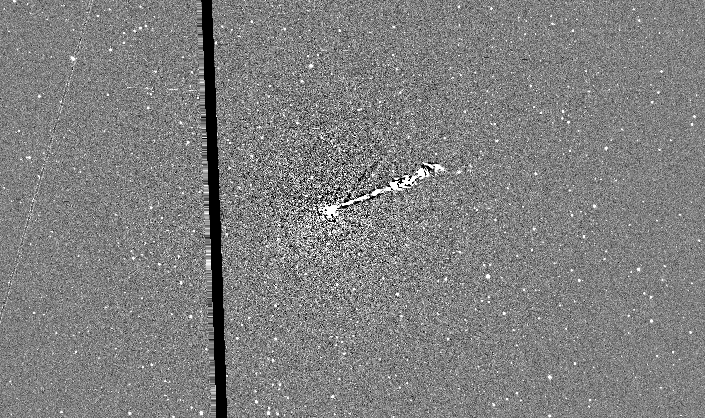

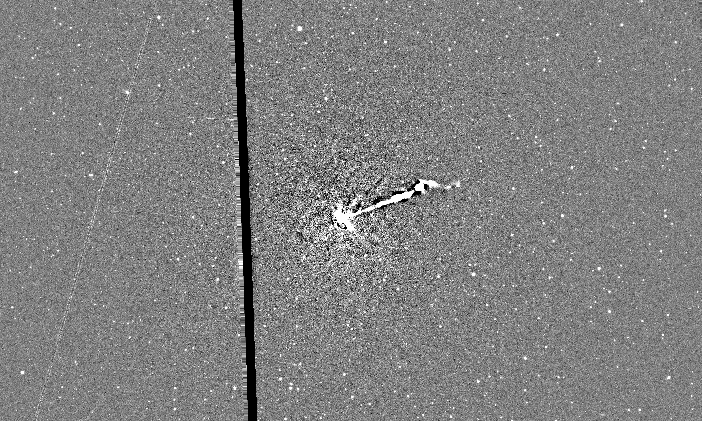

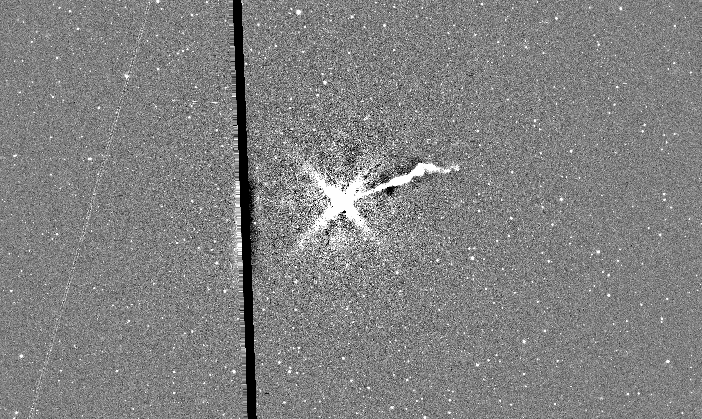

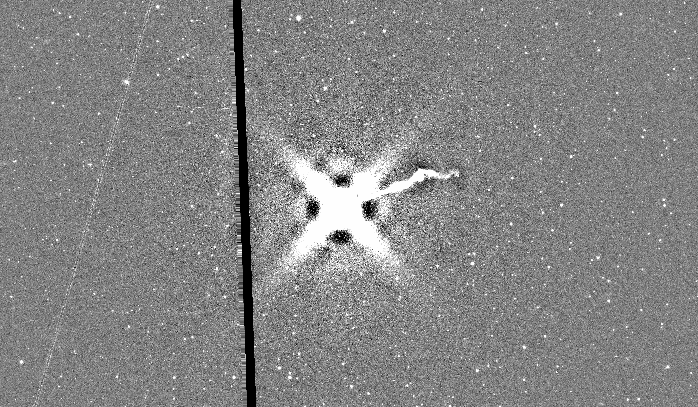

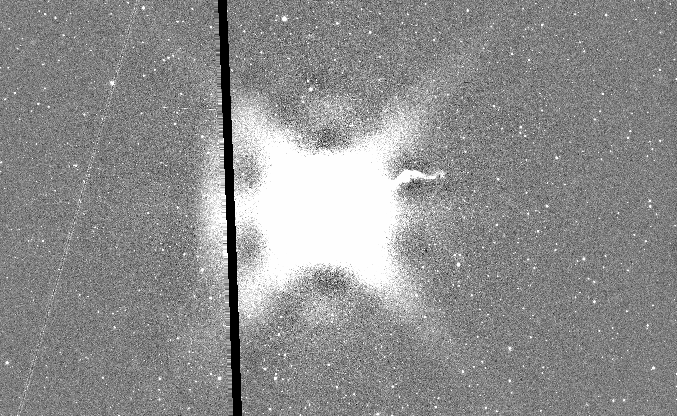

In [1]:
from IPython.display import Image, display

listOfImageNames = ['Otros/8.png',
                    'Otros/16.png','Otros/32.png','Otros/64.png','Otros/128.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Se puede notar que los mejores resultados se dan para entre 16x16 y 32x32, en los demás casos o la galaia es aún muy prominente o se agrega mucho ruido. Luego se dejó para 16x16 donde practicamente no se observa la galaxia y disminuir el tamaño de la grilla aún más no ayuda de mucho.

El siguiente parámetro importante es el tamaño de la apertura. Para esto es de utilidad estudiar el valor promedio de la FWHM, utilizando Iraf se observó que para ambas imagenes el valor era cercano a 2.7, luego un valor de apertura apropiado seran 6 pixeles de diametro.

En el primer caso usamos un método de selección poco exigente: Threshold= 2$\sigma$. De modo que se obtuvieron muchas detecciones en las zonas centrales de la galaxia.

Luego el match de catalogos:

In [2]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import ascii

f475=ascii.read("f475.txt")
f850=ascii.read("f850.txt")




ra475=[]
dec475=[]
ra850=[]
dec850=[]

for i in f475:
    ra475.append(i[8])
    dec475.append(i[9])
for i in f850:
    ra850.append(i[8])
    dec850.append(i[9])
    

c1 = SkyCoord(ra=ra475*u.degree, dec=dec475*u.degree)#f475w
c2 = SkyCoord(ra=ra850*u.degree, dec=dec850*u.degree) #f850lp
match, dist, d3d = c1.match_to_catalog_sky(c2,nthneighbor=1) 


/home/zapredfield/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/home/zapredfield/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /home/zapredfield/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Obtenemos G, Z y G-Z:

In [3]:
mag475=[]
mag850=[]
mag850inicial=[]

for i in f850:
    mag850inicial.append(i[4])
    
for i in f475:
    mag475.append(i[4]) 
    
for i in match:
    mag850.append(mag850inicial[i])

Para ver una primera imagen de que tenemos hacemos un diagrama estilo CMD.

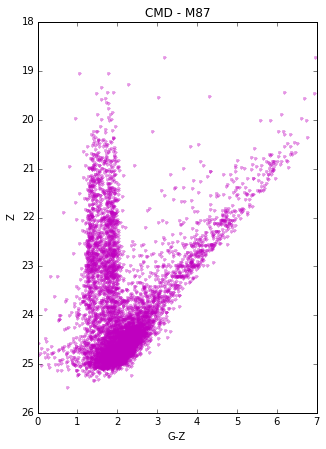

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.figure(figsize=(5,7))
plt.xlim(0,7)
plt.ylim(18,26)
plt.title("CMD - M87")
plt.xlabel("G-Z")
plt.ylabel("Z")
ax = plt.gca()
ax.invert_yaxis()
plt.plot(np.array(mag475) -np.array(mag850),np.array(mag850),".m",alpha=0.4)
plt.show()

Luego creamos un histograma de G-Z, se ve uno de los dos maximos que se esperarían para las dos bandas.

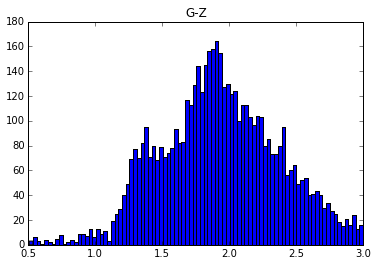

In [5]:
GZin=np.array(mag475) -np.array(mag850)
gz=[]

for i in GZin:
    if i>=0.5 and i<=3:
        gz.append(i)

cuentas=plt.hist(gz,bins=90)
plt.title("G-Z")
plt.show()

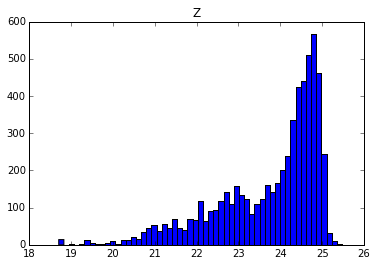

In [12]:
Z=[]
for i in mag850:
    if i>=18 and i<=28:
        Z.append(i)


cuentas=plt.hist(np.array(Z),bins=55)
plt.xlim(18,26)
plt.title("Z")
plt.show()

In [13]:
maxima=max(cuentas[0])
for i in range(len(cuentas[0])):
    if cuentas[0][i]==maxima:
        posicion=i

maxgz=cuentas[1][posicion]
print maxgz

24.7374181818


Luego si rigurizamos más la selección tomando Threshold=8 $\sigma$, de modo que no se tome ningun objeto presente en la zona central de la galaxia obtenemos:

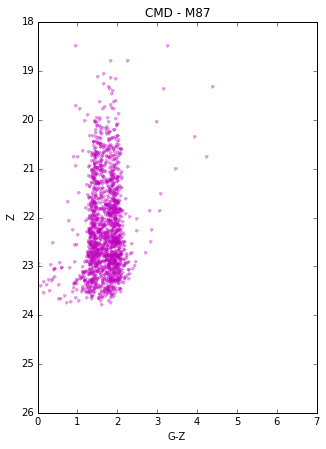

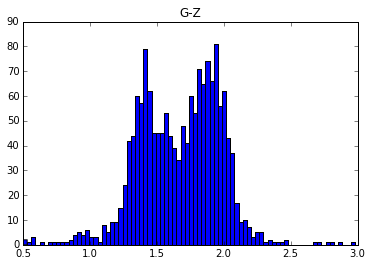

In [14]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import ascii

f475=ascii.read("f475_v2.txt")
f850=ascii.read("f850_v2.txt")




ra475=[]
dec475=[]
ra850=[]
dec850=[]

for i in f475:
    ra475.append(i[8])
    dec475.append(i[9])
for i in f850:
    ra850.append(i[8])
    dec850.append(i[9])
    

c1 = SkyCoord(ra=ra475*u.degree, dec=dec475*u.degree)#f475w
c2 = SkyCoord(ra=ra850*u.degree, dec=dec850*u.degree) #f850lp
match, dist, d3d = c2.match_to_catalog_sky(c1,nthneighbor=1) 

mag475=[]
mag850=[]
mag475inicial=[]

for i in f475:
    mag475inicial.append(i[4]-0.075)
    
for i in f850:
    mag850.append(i[4]-0.028) 
    
for i in match:
    mag475.append(mag475inicial[i])
    
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.figure(figsize=(5,7))
plt.xlim(0,7)
plt.ylim(18,26)
plt.title("CMD - M87")
plt.xlabel("G-Z")
plt.ylabel("Z")
ax = plt.gca()
ax.invert_yaxis()
plt.plot(np.array(mag475) -np.array(mag850),np.array(mag850),".m",alpha=0.4)
plt.show()


GZin=np.array(mag475) -np.array(mag850)
gz=[]

for i in GZin:
    if i>=0.5 and i<=3:
        gz.append(i)

cuentas=plt.hist(gz,bins=80)
plt.title("G-Z")
plt.show()

Ahora se ven claramente los dos máximos y se ha eliminado toda la zona derecha de la CMD que se veia en el caso anterior.

Obtenidas las magnitudes más comunes de los cumulos globulares de la galaxia pasamos a buscar la distancia a esta. Para ello se utiliza un intervalo de magnitudes absolutas comunes para cumulos globulares obtenido en Jordan et al 2006 (https://arxiv.org/pdf/astro-ph/0609371.pdf). Este rango es $-8.7>z>-10.8$.

Luego queremos nuestra luminosidad en z más común, es decir, el máximo del histograma de magnitudes aparentes de f475w.

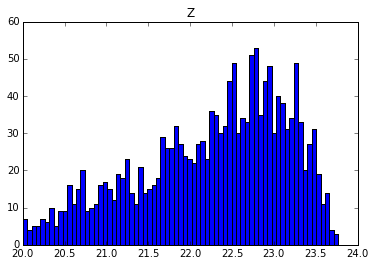

maximo: 22.760577


In [29]:
Z=[]
for i in mag850:
    if i>=18 and i<=24:
        Z.append(i)


cuentas=plt.hist(np.array(Z),bins=100)
plt.title("Z")
plt.xlim(20,24)
plt.show()

maxima=max(cuentas[0])
for i in range(len(cuentas[0])):
    if cuentas[0][i]==maxima:
        posicion=i

maxgz=cuentas[1][posicion]
print "maximo:",maxgz

Revisando el histograma con distintos número de bins se encuentra una magnitud aparente en el máximo de 22.8. Debido a la forma del histograma no es posible ajustarle una gaussiana efectivamente.

Luego probando con el intervalo de magnitud absoluta conocida:

In [31]:
from decimal import Decimal


Mabs=[-8.7,-9.75,-10.8]
m=22.8

for M in Mabs:
    modulo=m-M
    print '%.2E' % Decimal(10**(0.2*(modulo+5)))

2.00E+07
3.24E+07
5.25E+07


Aún nos faltan algunas correcciones.

Apertura:
(Utilizando codigo solución Tarea 1)


In [43]:
eff_wav = np.arange(5500, 10001, 250)

corr=np.array([0.243,0.244,0.247,0.245,0.245,0.250,0.251,0.252,0.259,0.274,0.291,0.308,0.330,0.364,0.398,0.477,0.564,0.673,0.784])


from scipy.interpolate import interp1d
apcorr = interp1d(eff_wav, corr)

ac850 = apcorr(9120.2)

print 'Correccion apertura F850lp: ', ac850


Correccion apertura F850lp:  0.4359832


Reddening:

En Sirianni Tabla 14 encontramos que para galaxias elipticas (E) el extinction ratio es de 1.472. De NED se obtiene E(B-V)=0.028 para f850lp.

Por lo tanto:

In [44]:
red850=1.472*0.028
print "Reddening:",red850

Reddening: 0.041216


Agregando estas correcciones se obtienen nuevos resultados:

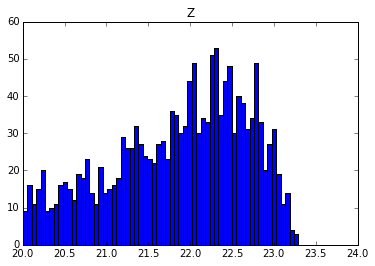

maximo: 22.284577


In [49]:
Z=[]
for i in mag850:
    if i>=18 and i<=24:
        Z.append(i-0.435-0.041)


cuentas=plt.hist(np.array(Z),bins=100)
plt.title("Z")
plt.xlim(20,24)
plt.show()

maxima=max(cuentas[0])
for i in range(len(cuentas[0])):
    if cuentas[0][i]==maxima:
        posicion=i

maxgz=cuentas[1][posicion]
print "maximo:",maxgz

In [50]:
m=22.25

for M in Mabs:
    modulo=m-M
    print '%.2E' % Decimal(10**(0.2*(modulo+5)))

1.55E+07
2.51E+07
4.07E+07


Por lo tanto 1.6Mpc esta dentro del intervalo esperado. Este número se da exactamente si la magnitud absoluta de un cumulo globular es de -8.77.

In [53]:
print "Magnitud absoluta ideal para el resultado:",22.25-5*np.log10(1.6*10**7)+5
modulo=m--8.77
print "Distancia esperada:",'%.2E' % Decimal(10**(0.2*(modulo+5)))

Magnitud absoluta ideal para el resultado: -8.77059991328
Distancia esperada: 1.60E+07


Rayos X

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits

xray= fits.open('xray.fits')


In [55]:
xray[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1550 / length of data axis 1                          
NAXIS2  =                 1550 / length of data axis 2                          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =     1.0000000000E+00                                                  
BZERO   =     0.0000000000E+00                                                  
CRVAL1  =     1.8770151717E+02                                                  
CRVAL2  =     1.2382383119E+01                                                  
CRPIX1  =     8.9775000000E+02                                                  
CRPIX2  =     7.3275000000E+

Con una selección de Threshold=7$\sigma$ se toman practicamente todos los cúmulos visibles importantes. Luego queremos comparar este catalogo con alguno de los anteriores.

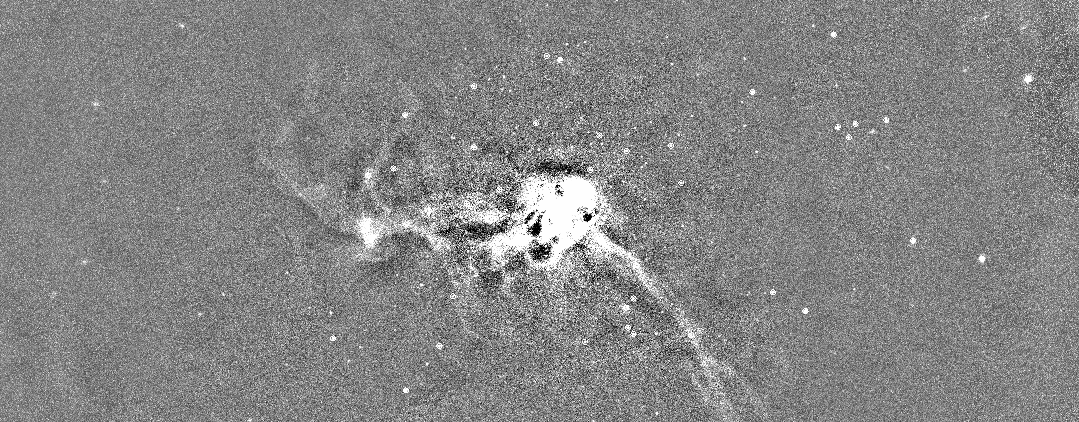

In [56]:
from IPython.display import Image, display

listOfImageNames = ['Otros/x.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Luego comparamos el catalogo con los obtenidos anteriormente.

In [57]:
xray=ascii.read("xray.txt")

In [58]:
ra475=[]
dec475=[]
rax=[]
decx=[]

for i in f475:
    ra475.append(i[8])
    dec475.append(i[9])
for i in xray:
    rax.append(i[8])
    decx.append(i[9])
    

c1 = SkyCoord(ra=ra475*u.degree, dec=dec475*u.degree)#f475w
c2 = SkyCoord(ra=rax*u.degree, dec=decx*u.degree) #f850lp
match, dist, d3d = c2.match_to_catalog_sky(c1,nthneighbor=1) 

In [59]:
print dist

[u'0d00m03.109s' u'0d09m58.3378s' u'0d09m56.7584s' u'0d09m53.7004s'
 u'0d09m51.7283s' u'0d09m33.5452s' u'0d09m50.739s' u'0d09m41.5553s'
 u'0d09m42.7467s' u'0d09m38.6818s' u'0d09m47.5911s' u'0d09m39.5086s'
 u'0d09m37.1592s' u'0d09m26.5316s' u'0d09m24.1861s' u'0d09m13.3828s'
 u'0d09m15.5309s' u'0d09m08.8702s' u'0d09m07.5228s' u'0d09m03.2996s'
 u'0d10m15.136s' u'0d08m40.4459s' u'0d08m34.1683s' u'0d09m53.2532s'
 u'0d09m02.6134s' u'0d09m11.2815s' u'0d08m50.2573s' u'0d08m41.0219s'
 u'0d09m25.8828s' u'0d09m39.7543s' u'0d09m54.5647s' u'0d07m39.3528s'
 u'0d09m43.3574s' u'0d09m19.2456s' u'0d07m16.5263s' u'0d09m15.6943s'
 u'0d09m08.8787s' u'0d08m44.8217s' u'0d05m33.7311s' u'0d08m02.9153s'
 u'0d07m57.0579s' u'0d08m20.3314s' u'0d08m27.698s' u'0d08m49.827s'
 u'0d08m59.3949s' u'0d08m59.0845s' u'0d04m54.3011s' u'0d08m56.391s'
 u'0d08m46.9631s' u'0d04m38.0847s' u'0d08m29.7798s' u'0d09m17.3264s'
 u'0d09m53.8966s' u'0d03m14.2279s' u'0d06m48.0178s' u'0d07m46.1607s'
 u'0d09m39.6407s' u'0d08m48.3229s' u'0d0

Luego solo nos quedamos con los que tengan distancias pequeñas (orden de decimas de segundo).

In [60]:
from astropy.coordinates import Angle
a=Angle('0d0m1s')

matches=[]
for i in range(len(dist)):
    if dist[i]>a:
        matches.append("N")
    if dist[i]<=a:
        matches.append(match[i])
        
for i in matches:
    if i!= "N":
        print i

861
849
1170
138
1040
827
1365
1640
1618
1542


Eliminando terminos con grandes distancias entre catalogos obtenemos solo 10 matches con f475w.

In [61]:
rax=[]
decx=[]
ra850=[]
dec850=[]

for i in xray:
    rax.append(i[8])
    decx.append(i[9])
for i in f850:
    ra850.append(i[8])
    dec850.append(i[9])
    

c1 = SkyCoord(ra=rax*u.degree, dec=decx*u.degree)#xray
c2 = SkyCoord(ra=ra850*u.degree, dec=dec850*u.degree) #f850lp
match, dist, d3d = c1.match_to_catalog_sky(c2,nthneighbor=1) 

In [62]:
matches=[]
for i in range(len(dist)):
    if dist[i]>a:
        matches.append("N")
    if dist[i]<=a:
        matches.append(match[i])
        
for i in matches:
    if i!= "N":
        print i

843
841
1162
123
1042
801
1333
1415
1532
1523


También vemos que se encuentran 10 matches para f850lp.

Como se puede ver en las imágenes F850lp y F475w esta galaxia poseé un notorio jet, el cual debe provenir de un agujero negro masivo en el centro de la galaxia, luego el disco de acreción de este emitirá rayos X debido a su gas de alta temperatura.

La mayor fuente de rayos X en cumulos globulares y la razón principal por la cual se ven fuentes puntuales en la imagen es debido a la gran cantidad de estrellas binarias de baja masa que emiten en esta frecuencia. Estas estructuras poseen una gran cantidad de binarias de este tipo comparado con el resto de la galaxia con una probabilidad dos ordenes de magnitud mayor de encontrar una.


Referencias:

https://ned.ipac.caltech.edu/level5/March04/Verbunt/Verbunt1.html

http://www.pnas.org/content/107/16/7164.full